In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('instagramcom-labeling.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df = df.dropna()
df

,Steming,Label
0,selamat,Positif
1,kakak maribelajar uang saku,Netral
2,tolong tag kakak,Positif
3,kakmaaf kakak,Negatif
4,selamat malam kakak mohon maaf ganggu buka lin...,Positif
...,...,...
412,siaap kakak,Positif
413,min ajar hari jam jam,Netral
414,umum kakak,Netral
415,min langsung apply test,Netral


In [3]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_3964\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Netral     229
Positif    164
Negatif     24
Name: count, dtype: int64

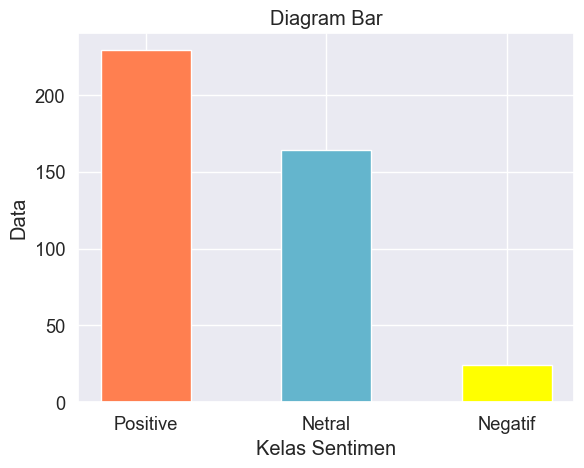

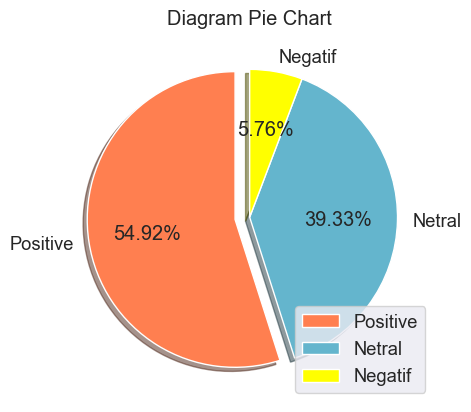

In [4]:
labels = ['Positive','Netral','Negatif']
Category2 = [229,164,24]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c','yellow'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar')
plt.show()

#pie chart
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [5]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.4, random_state = 1)

In [6]:
# Membuat data frame dari hasil split
df_train60 = pd.DataFrame()
df_train60['Steming'] = train_X
df_train60['Label'] = train_Y

df_test40 = pd.DataFrame()
df_test40['Steming'] = test_X
df_test40['Label'] = test_Y

In [7]:
#Data frame train hasil pembagian
df_train60

,Steming,Label
208,hai dear mohon cek email kirim informasi baru,Positif
414,umum kakak,Netral
355,iya kakak,Positif
70,min mohon cek pesan terimakasih,Positif
392,office kakak,Netral
...,...,...
255,sedia jenjang didik kakak,Positif
72,lolos program sib masuk kelompok,Netral
396,office luar tulis akun office officenyaa,Netral
235,cek pesan,Netral


In [8]:
#Data Frame test Hasil Pembagian
df_test40

,Steming,Label
162,min lowong kmren proses terima tolong tolak ng...,Positif
356,hai teman teman test tanggal januari ada umum ...,Positif
228,daftar pathway kakak,Netral
164,hi kakak akun maribelajar non aktif,Netral
173,kakak,Netral
...,...,...
204,tunggu email pesan dibales,Netral
16,power bi pakai teliti kualitatif wawancara sus...,Positif
333,kakak pre test tanggal kah,Netral
0,selamat,Positif


In [9]:
df_test40.to_csv('instagramcom-test40.csv')

In [10]:
df_train60.to_csv('instagramcom-train60.csv')

In [11]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_6040 = TfidfVectorizer()
tfidf_vect_6040.fit(df['Steming'])
train_X_tfidf_6040 = tfidf_vect_6040.transform(df_train60['Steming'])
test_X_tfidf_6040 = tfidf_vect_6040.transform(df_test40['Steming'])

In [12]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf_6040)

  (0, 354)	0.2855980937430955
  (0, 245)	0.3638448124651162
  (0, 185)	0.34201151426821075
  (0, 159)	0.40335901283710274
  (0, 128)	0.2609962509888762
  (0, 101)	0.37744090373238254
  (0, 83)	0.29053217178687235
  (0, 54)	0.45977243336221796
  (1, 596)	0.9094539907830813
  (1, 220)	0.41580456785457187
  (2, 220)	0.36436286812408886
  (2, 197)	0.9312570538430235
  (3, 561)	0.4931257009749351
  (3, 419)	0.46123006870722055
  (3, 354)	0.45339704580603424
  (3, 343)	0.354671410368816
  (3, 83)	0.46123006870722055
  (4, 381)	0.9546046819253042
  (4, 220)	0.2978756472863948
  (5, 465)	0.9661644353344211
  (5, 220)	0.2579268964162507
  (6, 605)	0.19364174547845908
  (6, 596)	0.11306704735905522
  (6, 589)	0.19364174547845908
  (6, 560)	0.10068754035966399
  :	:
  (244, 585)	0.501293263922403
  (244, 188)	0.5355296471953135
  (244, 52)	0.4184746796351606
  (245, 473)	0.48699930824904664
  (245, 220)	0.1620100121938822
  (245, 209)	0.606870838693823
  (245, 109)	0.606870838693823
  (246, 496)	

In [13]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_6040)

  (0, 576)	0.29554681116167525
  (0, 575)	0.36689853575054515
  (0, 560)	0.21418344100350623
  (0, 440)	0.3142309385963137
  (0, 364)	0.4119164617622994
  (0, 343)	0.17828132375665387
  (0, 300)	0.38558266318518364
  (0, 249)	0.38558266318518364
  (0, 175)	0.36689853575054515
  (1, 596)	0.21916890496516706
  (1, 566)	0.2863397685688366
  (1, 555)	0.6422528163716723
  (1, 541)	0.22132123030194917
  (1, 302)	0.32112640818583615
  (1, 205)	0.28010427785953246
  (1, 159)	0.2933104541237005
  (1, 3)	0.3753547147763079
  (2, 405)	0.8657893940081134
  (2, 220)	0.23113081291314985
  (2, 95)	0.4438324825259753
  (3, 371)	0.5349417873084913
  (3, 321)	0.37081473065661213
  (3, 220)	0.14280785952971173
  (3, 168)	0.27233351436775627
  (3, 17)	0.44227974871014286
  :	:
  (163, 527)	0.268355640146595
  (163, 441)	0.268355640146595
  (163, 428)	0.25119967763803336
  (163, 397)	0.25119967763803336
  (163, 311)	0.268355640146595
  (163, 264)	0.5023993552760667
  (163, 119)	0.268355640146595
  (163, 68

In [14]:
print(train_X_tfidf_6040.shape)
print(test_X_tfidf_6040.shape)

(250, 641)
(167, 641)


In [15]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_6040.vocabulary_)

{'selamat': 475, 'kakak': 220, 'maribelajar': 321, 'uang': 588, 'saku': 462, 'tolong': 576, 'tag': 532, 'kakmaaf': 221, 'malam': 313, 'mohon': 354, 'maaf': 306, 'ganggu': 145, 'buka': 77, 'link': 292, 'format': 138, 'surat': 522, 'nyata': 379, 'tanggung': 543, 'mutlak': 358, 'mahasiswa': 308, 'isi': 194, 'susah': 526, 'hapus': 163, 'sedia': 473, 'harap': 164, 'tanggal': 541, 'terima': 560, 'kasih': 229, 'juta': 216, 'bulan': 78, 'scraping': 471, 'bahasa': 46, 'python': 443, 'ayo': 40, 'ikut': 176, 'giat': 149, 'takut': 535, 'narsumnya': 360, 'mantaaap': 316, 'lupa': 305, 'hadirr': 158, 'main': 309, 'menkrep': 335, 'paket': 398, 'kursus': 270, 'cepat': 84, 'hi': 168, 'latih': 281, 'batchnya': 59, 'lembaga': 284, 'daftar': 95, 'perintah': 412, 'sertifikat': 489, 'bnsp': 72, 'halo': 162, 'usaha': 604, 'kerja': 242, 'teknologi': 551, 'informasi': 185, 'komunikasi': 253, 'swasta': 528, 'indonesia': 181, 'power': 428, 'bi': 68, 'pakai': 397, 'teliti': 554, 'kualitatif': 264, 'wawancara': 619

In [16]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear',
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_6040,train_Y)

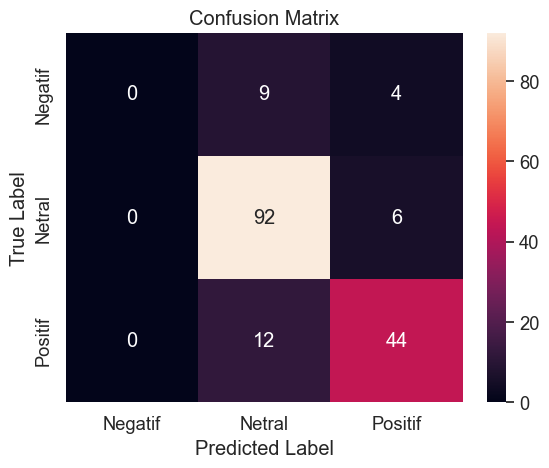

In [17]:
# Proses Pengujian
predictions_SVM_6040 = clf.predict(test_X_tfidf_6040)

#simpan data frame
test_prediction_6040 = pd.DataFrame()
test_prediction_6040['Text'] = test_X
test_prediction_6040['Label'] = predictions_SVM_6040

test_prediction_6040.to_csv('instagramcom-test_prediction_6040.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_6040), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_6040))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_6040))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_6040, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_6040, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_6040, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        13
      Netral       0.81      0.94      0.87        98
     Positif       0.81      0.79      0.80        56

    accuracy                           0.81       167
   macro avg       0.54      0.57      0.56       167
weighted avg       0.75      0.81      0.78       167

Accuracy of the model :  0.8143712574850299
Precision of the model:  0.542991368950071
Recall of the model:  0.5748299319727891
F1-score of the model:  0.557345971563981


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [19]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_X_tfidf_6040,train_Y)
predictions= clf.predict(test_X_tfidf_6040)

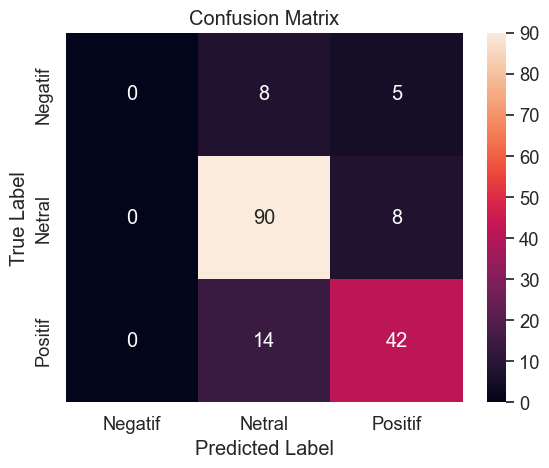

In [20]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report


print (classification_report(test_Y, predictions))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions))
print('Precision of the model: ', precision_score(test_Y, predictions, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        13
      Netral       0.80      0.92      0.86        98
     Positif       0.76      0.75      0.76        56

    accuracy                           0.79       167
   macro avg       0.52      0.56      0.54       167
weighted avg       0.73      0.79      0.76       167

Accuracy of the model :  0.7904191616766467
Precision of the model:  0.5224025974025974
Recall of the model:  0.5561224489795918
F1-score of the model:  0.5379665379665379


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c